<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

# **Predicción del precio de hospedajes en Airbnb para la ciudad de Nueva York**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un modelo que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb? Y además que permita predecir el precio de un hospedaje dadas ciertas características del mismo.

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que cree varios modelos que permitan predecir el precio de un hospedaje dadas ciertas características del mismo, además de responder algunas preguntas de negocio. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Añada comentarios al código para que documente sus soluciones. 
* Coloque su análisis en una celda de Texto luego de cada resultado.
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html
* Documentación de Scikit-learn. https://scikit-learn.org/stable/

## Instalar, actualizar y cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
sns.set()

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)
print('Scikit-learn',sklearn.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
Scikit-learn 1.0.2


Este caso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
Scikit-learn 1.0.2
```

## **Etapas de la Fase de modelamiento**

Antes de comenzar, debemos revisar el cumplimiento de algunas condiciones y los pasos a seguir durante esta fase.

**Condiciones iniciales:**
1. Se hizo una fase de exploración prevía en la cuál se encontraron relaciones importantes, se encontraron errores o problemas que debían ser corregidos.
2. Se hizo la limpieza de valores faltantes, atípicos y además la transformación de las variables cualitativas.
**Pasos en la fase de modelamiento**
3. Se tiene una clara variable objetivo, y se ha definido cual es el problema a resolver.
4. Definir los algoritmos de trabajo.
5. Entrenar modelos, optimizarlos y evaluar su desempeño
6. Extraer valor de los modelos construidos

**Análisis de nuestra situación**

En las fases previas nos hemos encargado de los dos primeros pasos.  Tenemos una clara variable objetivo, el precio por noche de nuestros hospedajes en la ciudad de Nueva York, al tratarse de una variable cuantitativa estaremos resolviendo un **problema de regresión**. Como modelos preliminares estaremos empleando los algoritmos de Vecinos más Cercanos y Árbol de Decisión. Para la evaluación de modelos emplearemos el error cuadrático medio. En la siguiente fase realizaremos dos modelos más complejos usando Redes Neuronales y Bosque Aleatorio.

A continuación se listan las tareas que realizaremos en esta Fase:
1. Exploración rápida del conjunto de datos
2. Partición de prueba y entrenamiento
3. Entrenamiento y optimización de un modelo usando Vecinos más Cercanos
4. Entrenamiento y optimización de un modelo usando Árboles de Decisión.
5. Aprovechamiento del árbol
6. Comparación de los modelos obtenidos
7. Conclusiones 

## Cargar el dataset de trabajo

Vamos a cargar el archivo producto de la fase de Limpieza y Transformación. Un conjunto de datos sin datos atípicos, valores faltantes y con las transformaciones necesarias.

In [ ]:
airbnb = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/data/aibnb_limpio_sinnas_sincat.csv')
airbnb.head()

,price,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,18.0,40.64749,-73.97237,1.0,1.0,1,1,0.0,1.0,0,1,0
1,150,80.0,40.80902,-73.94190,1.0,1.0,1,1,0.0,0.0,0,1,0
2,190,80.0,40.79685,-73.94872,1.0,1.0,2,2,0.0,0.0,1,0,0
3,60,18.0,40.65599,-73.97519,12.0,1.0,1,1,1.0,1.0,0,1,0
4,80,101.0,40.86754,-73.92639,1.0,1.0,1,1,0.0,1.0,0,1,0


In [ ]:
# Dimensiones del dataframe
airbnb.shape

(30173, 13)

In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30173 entries, 0 to 30172
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      30173 non-null  int64  
 1   neighbourhood              30173 non-null  float64
 2   latitude                   30173 non-null  float64
 3   longitude                  30173 non-null  float64
 4   property_type              30173 non-null  float64
 5   bathrooms                  30173 non-null  float64
 6   bedrooms                   30173 non-null  int64  
 7   beds                       30173 non-null  int64  
 8   host_is_superhost          30173 non-null  float64
 9   parking                    30173 non-null  float64
 10  room_type_Entire home/apt  30173 non-null  int64  
 11  room_type_Private room     30173 non-null  int64  
 12  room_type_Shared room      30173 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 3.0 MB


In [ ]:
# El dataset de trabajo no contiene ningún valor nulo

airbnb.isnull().sum()

price                        0
neighbourhood                0
latitude                     0
longitude                    0
property_type                0
bathrooms                    0
bedrooms                     0
beds                         0
host_is_superhost            0
parking                      0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
dtype: int64

### Partición del dataset: Subconjuntos de prueba y entrenamiento

#### Ejercicio 1
1. Divida el dataset en variables predictoras con el nombre `X` y variable objetivo con el nombre `y`.
2. Use la función `train_test_split()` para obtener los subconjuntos de prueba y entrenamiento. La partición de prueba debe ser del 30%, emplee `random_state = 0`.


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Deje en el conjunto `X` todas las variables excepto el precio.
* Deje en el conjunto `y` solamente la variable precio.
* Importe la función `train_test_split()` desde el módulo sklearn. Más información [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
* Preste cuidado al orden de las variables generadas por la función `train_test_split()`.




In [ ]:
# Respuesta

Dimensiones de X de entrenamiento: (21121, 12)
Dimensiones de y de entrenamiento: (21121,)

Dimensiones de X de prueba: (9052, 12)
Dimensiones de y de prueba: (9052,)


Observemos cómo están distrbuidas las muestras en el conjunto de prueba y entrenamiento.

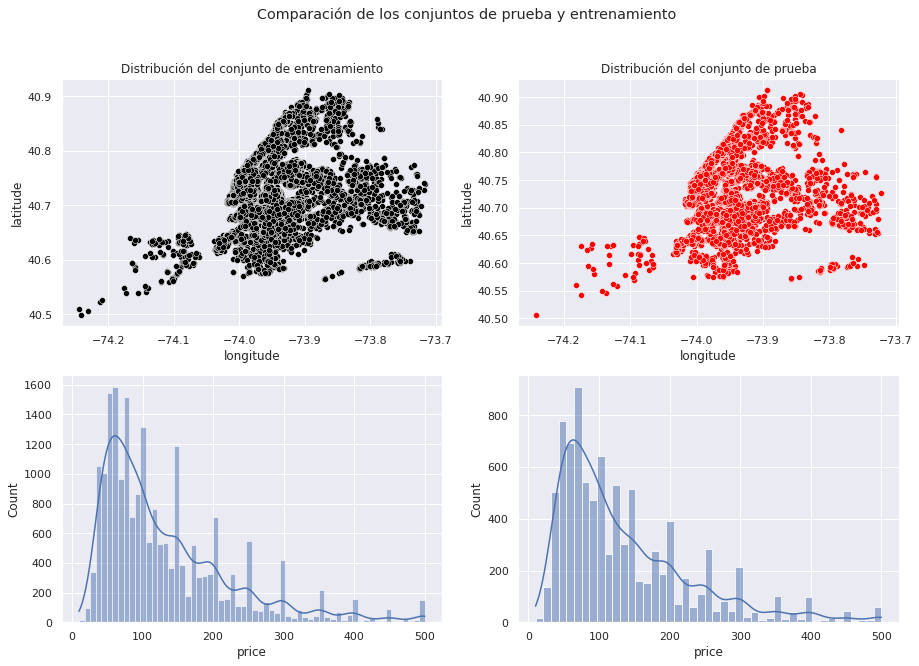

In [ ]:
# No modifique esta celda
# Esta celda le permite graficar los resultados del Ejercicio anterior

fig, ax = plt.subplots(2,2,figsize = (15,10))

plt.suptitle('Comparación de los conjuntos de prueba y entrenamiento', size = 'x-large')

ax[0,0].set_title('Distribución del conjunto de entrenamiento')
sns.scatterplot(data = X_train, x = 'longitude',y = 'latitude', color = 'black', ax =ax[0,0])

ax[0,1].set_title('Distribución del conjunto de prueba')
sns.scatterplot(data = X_test, x = 'longitude',y = 'latitude', color = 'red',ax = ax[0,1])

sns.histplot( x = y_train, kde = True, ax = ax[1,0])
sns.histplot( x = y_test, kde = True, ax = ax[1,1])


### **Vecinos más cercanos - KNN**

#### Ejercicio 2

Investigue cuales son las ventajas y desventajas del algoritmo de vecinos más cercanos. No olvide añadir las fuentes consultadas.

Respuesta

Entrenemos ahora nuestro primero modelo usando el regresor de vecinos más cercanos.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

Note que no hemos pasado ningún parámetro al algoritmo. Sin embargo, se ha entrenado exitosamente un modelo.

#### Ejercicio 3 

Investigue cuales fueron los parámetros por defecto usados para entrenar el modelo `knn`, preste atención especial al número de vecinos usados y la métrica para medir distancia que se empleó. ¿Se usó la métrica euclidiana, Manhattan o coseno?




<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

Puede consultar en la documentación los parámetros por defecto del regresor `KNeighborsRegressor`. Recuerde que puede usar diferentes extensiones para traducir la documentación.


Respuesta

#### Ejercicio 4

Evalué el desempeño del modelo `knn` con el conjunto de prueba. Calcule el error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$). ¿Qué opina acerca del desempeño de este primer modelo?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Primero debe hacer una predicción usando el conjunto `X_test`. El modelo `knn` no ha visto estos datos, por lo cuál nos permitirá conocer el desempeño del modelo con nuevas observaciones.
* Importe desde el módulo `sklearn.metrics` las dos funciones para calcular las métricas.


In [ ]:
# Respuesta


Resultados del modelo knn
------------------------------------
El coeficiente de determinación es:  0.5294857099238868
El error cuadrático medio es:  4106.822425983209


### **Experimentación**

Vamos a modificar la complejidad del modelo con el fin de optimizar la salida. La complejidad puede ser modificada cambiando el parámetro K, número de vecinos. Vamos a realizar experimentos para determinar cuál es el parámetro que minimiza el error de predicción en el conjunto de prueba.

#### Ejercicio 5

Complete el siguiente código con el fin de encontrar el valor de error cuadrático medio para 40 modelos con valores impares de K entre 1 y 80.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Use el ciclo for para entrenar 40 modelos y evaluar su desempeño, recuerde guardar el error de cada modelo en la lista mse.


In [ ]:
# Respuesta

# Lista vacía para almacenar los errores
mse_knn = []
# Lista con los valores de K, valores impares de 1 a 80
valores_vecinos = range(1,80,2)

for i in range(1,80,2):
  knn = 
  knn.fit() 
  y_pred = 
  error = 
  mse_knn.append() 


Text(0, 0.5, 'Error cuadrático medio')

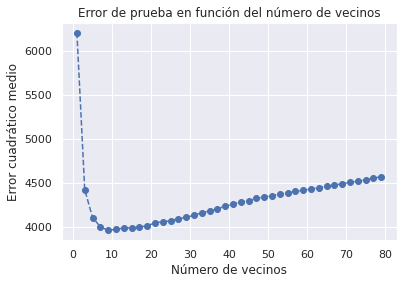

In [ ]:
# No modifique esta celda
# Esta celda le permite graficar los resultados del Ejercicio anterior

plt.plot(valores_vecinos, mse_knn,'o',linestyle='dashed')

plt.title('Error de prueba en función del número de vecinos')
plt.xlabel('Número de vecinos')
plt.ylabel('Error cuadrático medio')

#### Ejercicio 6

Basado en los experimentos realizados en el ejercicio 4, ¿cuál es el número de vecinos óptimo para el modelo de regresión?



Respuesta

#### Ejercicio 7

Entrene un modelo con el nombre `knn_final` con el número de vecinos óptimo que encontró en el Ejercicio 5. 

Evalue el desempeño del modelo `knn_final` con las siguientes métricas, recuerde hacer el cálculo con el conjunto de prueba.
* Error cuadrático medio (MSE)
* Raíz del error cuadrático medio (RMSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)

Interprete los coeficientes obtenidos, ¿cree que el modelo obtenido cumple con los requisitos del negocio?


In [ ]:
# Respuesta


El error cuadrático medio es: 3960.036327828786
La ráiz del error cuadrático medio es: 62.92881953309458
El error absoluto medio es: 42.35933127117396
El coeficiente de determinación es: 0.546302837523368


### Árboles de Decisión

#### Ejercicio 8

Investigue cuales son las ventajas y desventajas del algoritmo árbol de decisión. No añadir colocar las fuentes consultadas.

Respuesta

Entrenemos ahora nuestro primero modelo usando el regresor de vecinos más cercanos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state= 5)
tree.fit(X_train,y_train)


DecisionTreeRegressor(random_state=5)

Ya hemos entrenado un modelo preliminar usando un árbol de decisión sin control de hiperparámetros.

#### Ejercicio 9

Investigue y responda las siguientes preguntas.

¿Cuál fue el parámetro por defecto empleado para limitar la profundidad el árbol? 

¿Cuál fue la profundidad del árbol?

¿Qué opina de la complejidad del módelo obtenido?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Busque en la documentación de `DecisionTreeRegressor` el parámetro por defecto del hiperparámetro `max_depth`
* Busque en la documentación cómo acceder a la profundidad del árbol generado. 



In [ ]:
# Respuesta

La profundidad del modelo tree fue de 39


#### Ejercicio 10

Evalué el desempeño del modelo `tree` con el conjunto de prueba. Calcule el error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$). ¿Qué opina del desempeño de este modelo?



In [ ]:
# Respuesta

Resultados del modelo tree
------------------------------------
El coeficiente de determinación es:  0.29023252254017684
El error cuadrático medio es:  6195.112571807335


### **Experimentación**

Vamos a modificar la complejidad del modelo basado en árbol de decisión con el fin de optimizar la salida. La complejidad puede ser modificada cambiando el parámetro de profundidad maxima, la pureza de las hojas o el ccp_alpha. Vamos a realizar experimentos para determinar cuál es el parámetro de profundidad que minimiza el error de predicción en el conjunto de prueba.

#### Ejercicio 11

Complete el siguiente código con el fin de encontrar el valor de error cuadrático medio para 40 modelos con diferente profundidad máxima que va desde 1 hasta 40.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>


* Use el ciclo for para entrenar 40 modelos y evaluar su desempeño, recuerde guardar el error de cada modelo en la lista mse.


In [ ]:
# Respuesta

# Lista vacía para almacenar los errores
mse_tree = []
# Lista con los valores de profundidad, valores de 1 a 40
valores_profundidad = range(1,40,1)

for profundidad in valores_profundidad:
  tree =
  tree.fit()
  y_pred =
  error = 
  mse_tree.append()


Text(0, 0.5, 'Error cuadrático medio')

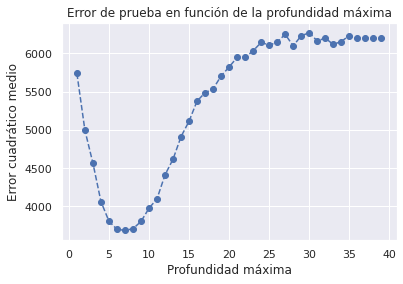

In [ ]:
# No modifique esta celda
# Esta celda le permite graficar los resultados del Ejercicio anterior

plt.plot(valores_profundidad, mse_tree,'o',linestyle='dashed')

plt.title('Error de prueba en función de la profundidad máxima')
plt.xlabel('Profundidad máxima')
plt.ylabel('Error cuadrático medio')

#### Ejercicio 12

Basado en los experimentos realizados en el ejercicio 11, ¿cuál es la profundidad óptima para el modelo de regresión?



Respuesta

#### Ejercicio 13

Entrene un modelo con el nombre `tree_final` con la profundidad óptima que encontró en el Ejercicio 11. 

Evalue el desempeño del modelo `tree_final` con las siguientes métricas, recuerde hacer el cálculo con el conjunto de prueba.
* Error cuadrático medio (MSE)
* Raíz del error cuadrático medio (RMSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)

Interprete los coeficientes obtenidos, ¿cree que el modelo obtenido cumple con los requisitos del negocio?


In [ ]:
# Respuesta


El error cuadrático medio es: 3960.036327828786
La ráiz del error cuadrático medio es: 62.92881953309458
El error absoluto medio es: 42.35933127117396
El coeficiente de determinación es: 0.546302837523368


### Extracción de valor

#### Ejercicio 14

Los árboles de decisión se caracterizan por su alta interpretabilidad, cree una lista llamada `importancia` con la importancia de las características del modelo `tree_final`. Analice la visualización obtenida, de acuerdo con el modelo entrenado. ¿Cuáles son las variables más importantes a la hora de predecir el precio de un hospedaje? 


In [ ]:
# Respuesta


[1.05622172e-03 9.35232802e-02 1.35576411e-01 2.51642253e-02
 1.20748321e-01 5.43394011e-02 1.56606874e-02 0.00000000e+00
 1.77435055e-05 5.53368357e-01 5.45351988e-04 0.00000000e+00]


Text(0, 0.5, 'Variables predictoras')

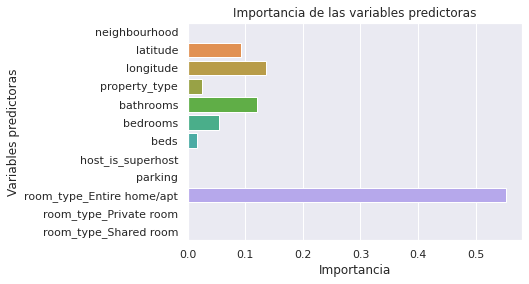

In [ ]:
# No modifique esta celda
# Esta celda le permite graficar los resultados del Ejercicio anterior

sns.barplot(x = importancia,y = list(X_train.columns))

plt.title('Importancia de las variables predictoras')
plt.xlabel('Importancia')
plt.ylabel('Variables predictoras')

#### Ejercicio 15 (Opcional)

Dibuje el árbol de decisión `tree_final`. 

Hay muchas formas de dibujar árboles de decisión, en el Notebook M5 - Introducción al problema de clasificación se ilustra una manera. Aquí les dejo algunos artículos que muestran otras formas. 
* https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
* https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

[Aquí](https://github.com/HarryVargas96/UdeCataluna/blob/main/data/tree.png?raw=true) les dejo el resultado de una de esas opciones. Si encuentran otras formas por favor no duden en compartirlas en el Foro.

In [ ]:
# Respuesta


### Conclusiones

#### Ejercicio 16

Para finalizar, compare los modelos obtenidos. A continuación se dejan algunas preguntas guia para que enfoque sus conclusiones.

¿Cuál es el mejor modelo? ¿Cuál modelo utilizaría en producción? 
Recuerde que las métricas no lo son todo, considere también la interpretabilidad del modelo y el tiempo de entrenamiento. Justifique su respuesta. ¿Qué hallazgos encontró con la fase de modelamiento? ¿Qué recomendaciones haría para mejorar el desempeño de los modelos? ¿Los modelos creados cumplieron con los objetivos demarcados?¿qué falta para que su modelo tenga el desempeño requerido? ¿qué otro algoritmo podría emplear para lograr mejores resultados?




|Métrica|Vecinos más cercanos|Árbol de Decisión|
|---|---|---|
|Error cuadrático medio|||
|Error absoluto medio|||
|Coeficiente de determinación|||

**Aquí termina la tercera fase del proyecto, ya hemos entrenado y optimizado dos modelos, en la siguiente y última fase se van a presentar 2 algoritmos más avanzados y algunos métodos optimizados para la busqueda de hiperparámetros.**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*